In [9]:
from readflights import ReadFlights
import sys
import numpy as np

rf = ReadFlights()
rf.openPKL(fileName = "../../../localdata/t_future_flas_240_fra_01.pkl", nMax=sys.maxsize)

# rf.plotFlights(rf.getFlightList()[:20000], time=([3600*10, 3600*12])) #, flightResample)

day = 3
hour = 0
duration = 12*60   # in min

start = 86400*day + hour*3600
end   = start + duration * 60

# df = rf.df[rf.df['time'].between(start, end)]

# fig = rf.plotFlights(list, df = df)

# day = 2
# df = rf.df[rf.df['time'].between(86400*day + 0, 86400*day + 60*60*24)]

# rf.plotFlights(list, df = df)

# get flights from 2nd to 4th day to finally extract day 3
list = rf.df[rf.df['time'].between(86400*0 + 0, 86400*0 + 60)]['id_'].unique().tolist()

# df = rf.getResampledFlights(list, sampleTime="120s") # use 3 and 4
df = rf.getResampledFlights(list, sampleTime="120s")

# df




resample flights


100%|██████████| 29/29 [00:01<00:00, 26.98it/s]


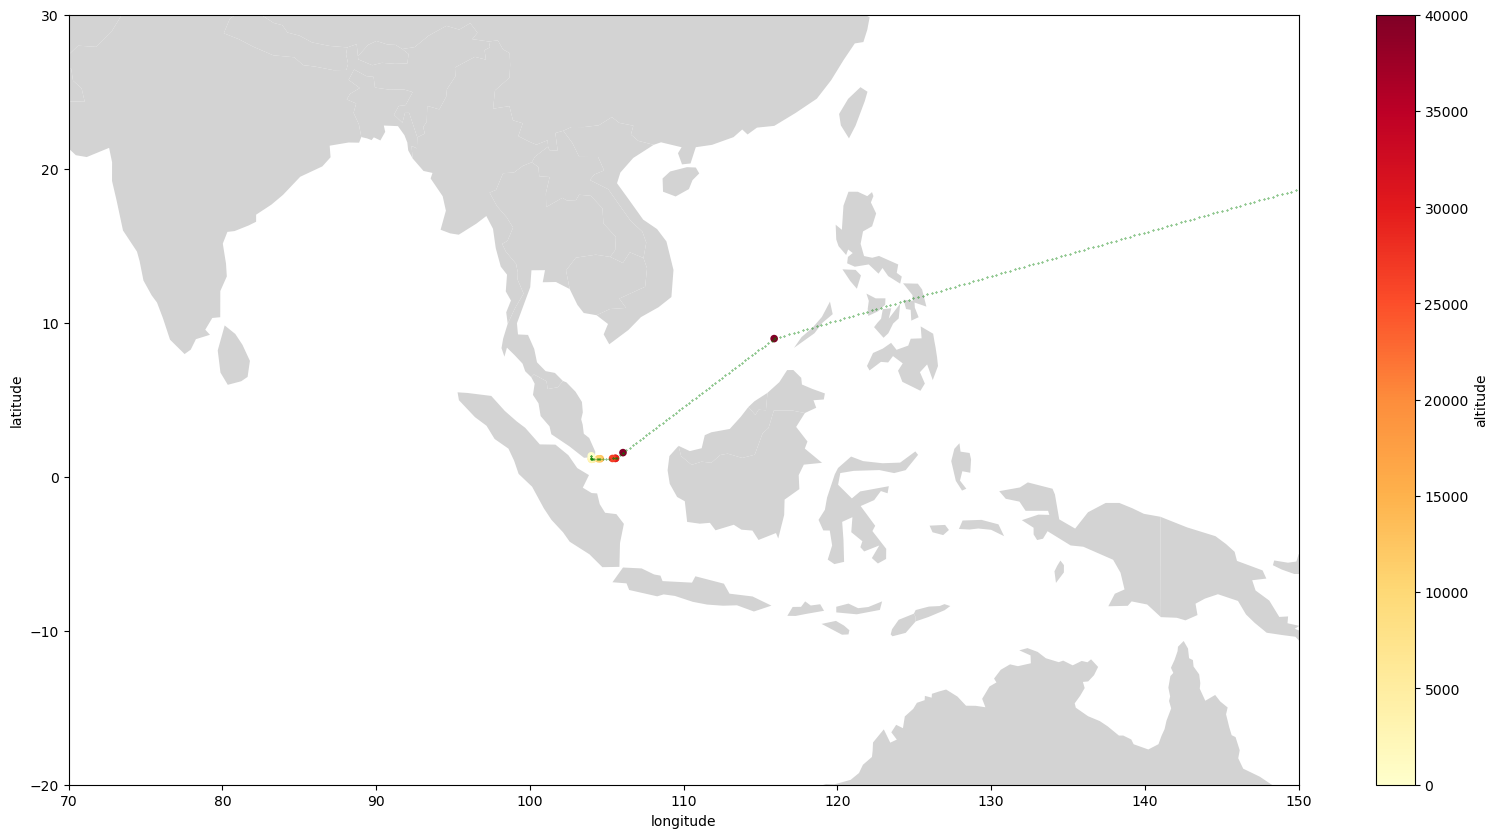

In [10]:
n = 3
flight = rf.df[rf.df['id_'] == n]
resample = df[df['id_'] == n]
rf.plotFlight(flight, flightResample=resample)

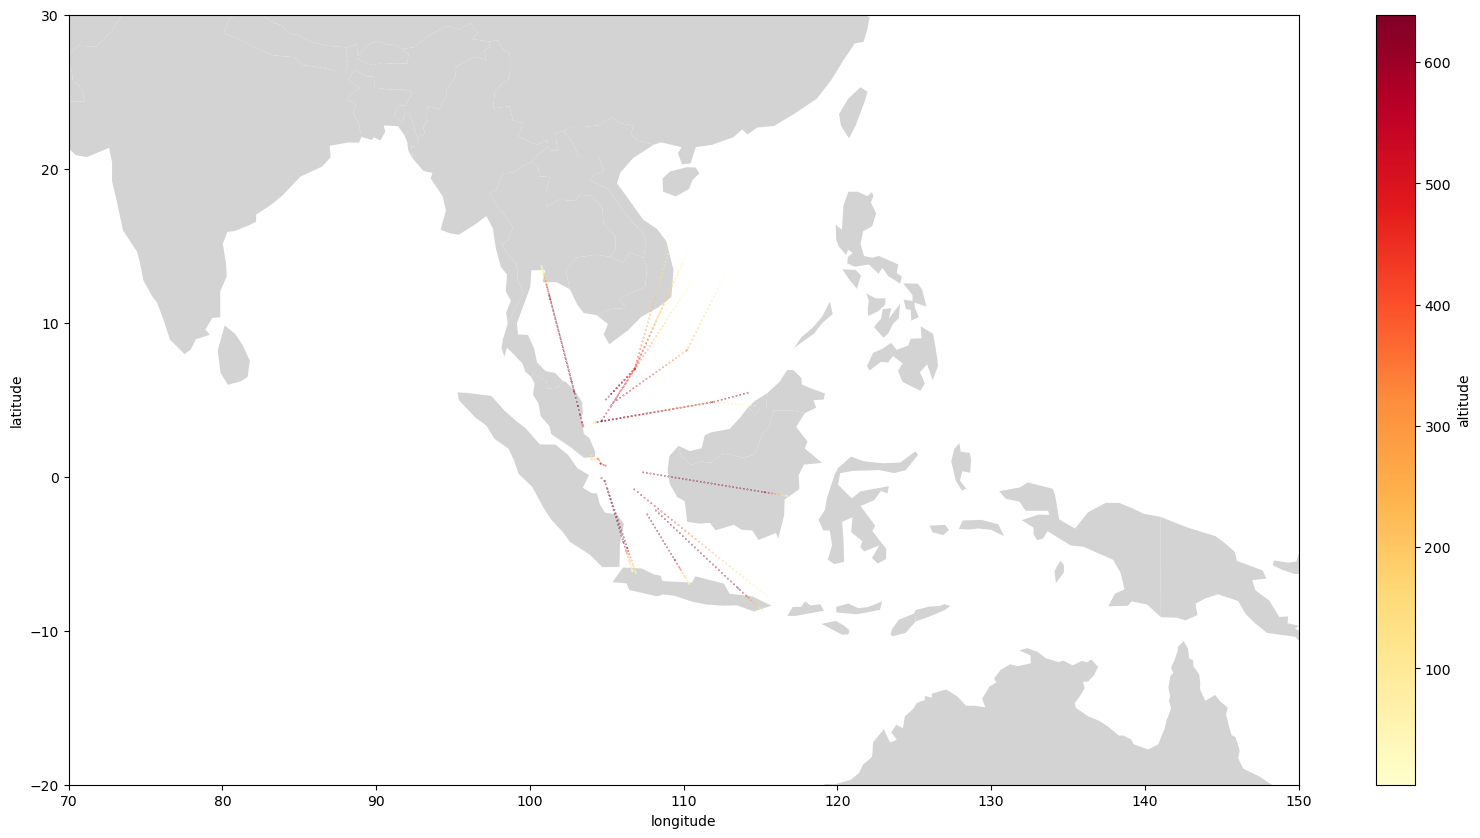

In [11]:
plotFlights([], resampleDF = df, time = [1000,6000])

# df['id_'].unique()

In [7]:
import rdp as RDP
import lzma
import pandas as pd
import numpy as np
from io import StringIO
from tqdm import tqdm
from pyproj import Transformer
import geopandas as gp
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import exists

from mpl_toolkits.axes_grid1 import make_axes_locatable


def plotFlights(flightIDs : list, resampleDF = None, time : list = None):
    # initialize an axis

    fig, ax = plt.subplots(figsize=(20,10))

    ax.set(xlim=(70,150), ylim=(-20, 30))
    # ax.set(xlim=(90,130), ylim=(-15, 25))

    countries = gp.read_file(gp.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey", ax=ax)

    flights = []

    # if resampleDF is None:
    #     if time == None:
    #         flights = self.df[self.df['id'].isin(flightIDs)]
    #     else:
    #         flights = self.df[
    #             self.df['id'].isin(flightIDs) 
    #             & self.df['time'].between(time[0], time[1])
    #         ]
    
    if resampleDF is not None:
        c = True
        for id_ in resampleDF['id_'].unique():
            pp = resampleDF[resampleDF['id_'] == id_]
            pp = pp[pp['time'].between(time[0], time[1])]
            pp.plot(x="longitude", y="latitude", c="altitude", kind="scatter", colormap= "YlOrRd", s=.05, ax=ax, colorbar = c)
            if c:
                c = False
        
        # plt.plot(x=[0], y=[0], c=[40000], colorbar = True)

In [17]:
from pyproj import Geod


lon0, lat0 = 170, 10
lon1, lat1 = -170, 20
n_extra_points = 5    

geoid = Geod(ellps="WGS84")
extra_points = geoid.npts(lon0, lat0, lon1, lat1, n_extra_points)

print(extra_points)

[(173.21174157766612, 11.77999776829622), (176.46465781794413, 13.52310829899642), (179.7646165417395, 15.223124194547221), (-176.8828371906267, 16.873670078095724), (-173.47257561915208, 18.468199328787623)]
